# Testing the `mydl` library

This notebook is a simple test of the `mydl` library. The library is a simple implementation of a deep learning framework. It is not intended to be used in production, but rather as a learning tool. 

In [1]:
import torch

We import the classes from the library.
<a id="importing_the_library"></a>

In [2]:
%cd .. 
from mydl.architecture import * # import all the classes and functions from the architecture module
from mydl.layers import * # import all the classes and functions from the layers module
from mydl.losses import * # import all the classes and functions from the losses module
from mydl.optimizers import * # import all the classes and functions from the optimizers module
%cd notebooks # change back to the notebooks directory

/Users/orlando/GitHub/SCUDO-MMinDL
[Errno 2] No such file or directory: 'notebooks # change back to the notebooks directory'
/Users/orlando/GitHub/SCUDO-MMinDL


/Users/orlando/GitHub/SCUDO-MMinDL/.venv/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
/Users/orlando/GitHub/SCUDO-MMinDL/.venv/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


---

To check whether the library is working, let us create a simple network with a single linear layer.

In [3]:
layers = [Linear(10,1)] # create a list of layers
model = Sequential(layers) # create a model with the layers

In [4]:
model.layers # this is a list of the layers in the model, layers are Layer objects from our layers module

In [5]:
model.layers[0].parameters # this outputs a dictionary of the parameters of the first layer. There are a 'W' and 'b' keys to distinguish between the weights and biases of the layer

{'W': tensor([[-1.5822],
         [-0.9992],
         [ 0.6416],
         [-0.8145],
         [ 1.0624],
         [-0.9240],
         [ 0.8465],
         [-1.3201],
         [-0.6431],
         [ 0.4752]]),
 'b': tensor([[0.]])}

The network was initialized correctly. 

---

Let us check if the forward pass is working correctly. 
<a id="forward_pass"></a>

In [6]:
layers = [Linear(10,6), 
          Sigmoid(),
          Linear(6,2), 
          Sigmoid(),
          Linear(2,1)]

In [7]:
model = Sequential(layers)

In [8]:
x = torch.randn(20,10)

In [9]:
y_pred = model.forward(x)
print(y_pred.shape)

torch.Size([20, 1])


The forward pass is working correctly.

---

Let us check if the computation of the loss is working correctly.
<a id="loss"></a>

In [10]:
y_true = torch.randn(20,1)

In [11]:
loss = MSE()

In [12]:
loss(y_pred, y_true)

tensor(1.4456)

Let us check if the backward pass for the loss is working correctly.
<a id="backward_pass_loss"></a>

In [13]:
loss.backward(y_pred, y_true).shape

torch.Size([1, 20])

The backward pass for the loss is working correctly.

---

Let us check if the backward pass for the whole network is working correctly.
<a id="backward_pass_sequential"></a>

In [27]:
model=Sequential([Linear(10,1), Sigmoid()])

In [28]:
loss = MSE()

In [29]:
x = torch.randn(20,10)
y_true = torch.randn(20,1)

In [30]:
y_pred = model.forward(x)

In [31]:
model.backward(y_true,loss)

The backward pass for the whole network is working correctly.

---

Let us check if the optimizer is working correctly.
<a id="optimizer"></a>

In [32]:
optimizer = GD(learning_rate=0.1)

In [33]:
model.backward(y_true,loss)

In [34]:
optimizer.update(model)

The optimizer updates the weights correctly.

---

Let us check if the `train` method is working. 
<a id="training"></a>

In [35]:
losses_train = model.train(x,y_true,loss,optimizer,10_000)

Training the network...
Training complete.


In [36]:
import matplotlib.pyplot as plt

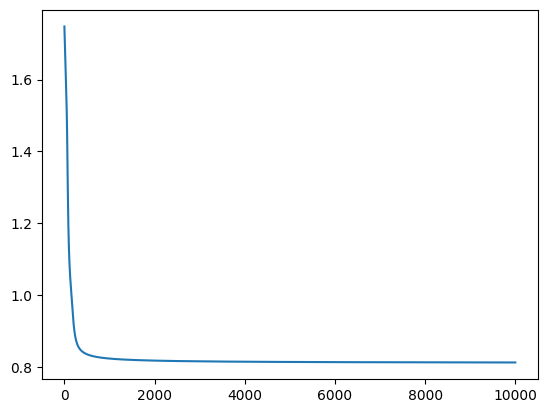

In [37]:
plt.plot(losses_train)

We see that the loss is decreasing. This is a good sign that the training is working.